In [ ]:
# Copyright 2022 Huawei Technologies Co., Ltd
# CREATED:  2020-06-04 20:12:13
# MODIFIED: 2022-08-17 09:48:45
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ============================================================================
"""Illustration of jupyter notebook"""

# -*- coding:utf-8 -*-
import time
import glob

from PIL import Image, ImageDraw
from PIL import ImageFont

from model.acl import NET
from utils.preprocessing import preprocess

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [4]:
np_imgs = []
pil_imgs = []
img_dims = []
device_id = 7
model_path = "weights/yolov5s_170.om"
img_path = "data/images/dog.jpg"

In [5]:
# Please, set the NET object once!
model = NET(device_id, model_path)

[ACL] init resource stage:
[ACL] init resource stage success
[MODEL] model init resource stage:
[MODEL] model input size 1
>> input  0
model input dims ({'name': 'x', 'dimCount': 4, 'dims': [1, 12, 320, 320]}, 0)
model input datatype 0
[MODEL] model output size 3
>> output  0
model output dims ({'name': 'output_0_trans_Cast_209_0', 'dimCount': 5, 'dims': [1, 20, 20, 3, 85]}, 0)
model output datatype 0
>> output  1
model output dims ({'name': 'output_1_trans_Cast_210_0', 'dimCount': 5, 'dims': [1, 40, 40, 3, 85]}, 0)
model output datatype 0
>> output  2
model output dims ({'name': 'output_2_trans_Cast_211_0', 'dimCount': 5, 'dims': [1, 80, 80, 3, 85]}, 0)
model output datatype 0
[MODEL] class Model init resource stage success


In [6]:
img_folder_path = glob.iglob(f'{"data/images"}/*')
for img_path in img_folder_path:
    # check if the image ends with png
    if (img_path.endswith('.png') or img_path.endswith('.jpg') or img_path.endswith('.jpeg')):
        np_img, img_dim = preprocess(img_path, model.get_model_input_dims())
        img_dims.append(img_dim)
        np_imgs.append(np_img)
        # open pil image
        pil_imgs.append(Image.open(img_path))

[PreProc] img_resize shape: (3, 640, 640)
[PreProc] image_np_expanded shape: (1, 3, 640, 640)
[PreProc] img_numpy shape: (1, 12, 320, 320)
[PreProc] img_resize shape: (3, 640, 640)
[PreProc] image_np_expanded shape: (1, 3, 640, 640)
[PreProc] img_numpy shape: (1, 12, 320, 320)
[PreProc] img_resize shape: (3, 640, 640)
[PreProc] image_np_expanded shape: (1, 3, 640, 640)
[PreProc] img_numpy shape: (1, 12, 320, 320)


In [7]:
%timeit -n 10 -r 3
multi_bboxes = model.run(np_imgs, img_dims)

[ACL] data interaction from host to device
[MODEL] create model input dataset:
[ACL] img_host_ptr, img_buf_size:  94556801318368 4915200
[MODEL] create model input dataset success
[MODEL] create model input dataset:
[MODEL] create model input dataset success
[MODEL] create model output dataset:
[MODEL] create model output dataset success
[MODEL] create model input dataset:
[ACL] img_host_ptr, img_buf_size:  94556811148800 4915200
[MODEL] create model input dataset success
[MODEL] create model input dataset:
[MODEL] create model input dataset success
[MODEL] create model output dataset:
[MODEL] create model output dataset success
[MODEL] create model input dataset:
[ACL] img_host_ptr, img_buf_size:  94556820979232 4915200
[MODEL] create model input dataset success
[MODEL] create model input dataset:
[MODEL] create model input dataset success
[MODEL] create model output dataset:
[MODEL] create model output dataset success
[ACL] data interaction from host to device success
[MODEL] execute

[472.0, 80.0, 690.0, 174.0] 0.77316093 2 car
[133.0, 208.0, 312.0, 548.0] 0.45836067 16 dog


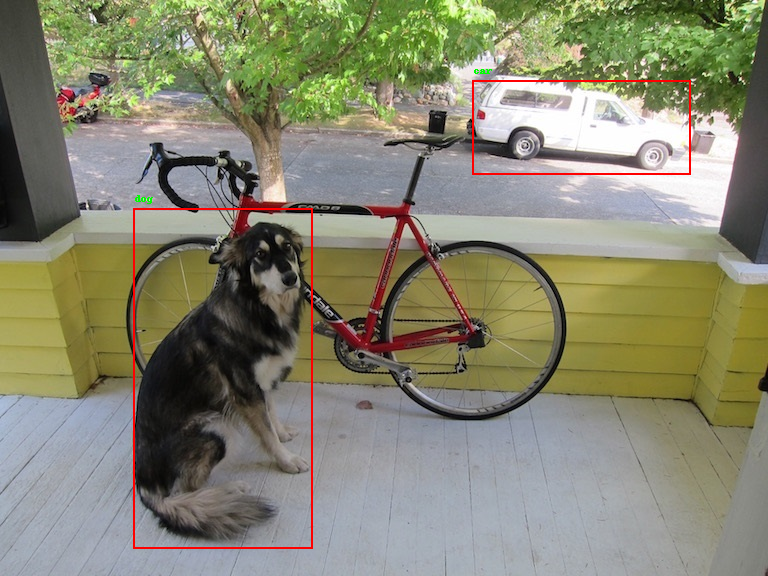

########################################################################################################################
[192.0, 100.0, 274.0, 379.0] 0.956337 0 person
[410.0, 133.0, 596.0, 370.0] 0.7639446 17 horse


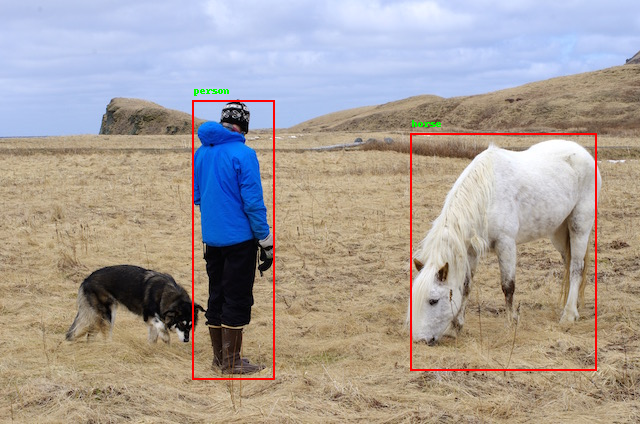

########################################################################################################################
[108.0, 607.0, 169.0, 757.0] 0.80719566 0 person
[213.0, 691.0, 273.0, 859.0] 0.7596264 0 person
[588.0, 78.0, 678.0, 157.0] 0.6070633 33 kite
[277.0, 238.0, 305.0, 279.0] 0.47969818 33 kite
[80.0, 512.0, 109.0, 562.0] 0.46486092 0 person


In [ ]:
for img, bboxes in zip(pil_imgs, multi_bboxes):   
    img1 = ImageDraw.Draw(img)
    
    for bbox in bboxes:
        img1.rectangle(list(bbox[:4]), outline ="red", width=2)
        img1.text((bbox[0] + 2,bbox[1] - 15),str(coco_labels[int(bbox[5])]),(0,255,0))  # draw text
        print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])
    
    img.show()
    print(120*"#")

In [ ]:
del model